In [1]:
base_dir = r"C:\Users\Shikhaj Somani\OneDrive\Desktop\ML\Garbage Classification\archive\Garbage classification\Garbage classification"


In [2]:
import os, shutil
from sklearn.model_selection import train_test_split

# Base directory containing class folders
base_dir = r"C:\Users\Shikhaj Somani\OneDrive\Desktop\ML\Garbage Classification\archive\Garbage classification\Garbage classification"
train_dir = "dataset/train"
test_dir = "dataset/test"

# Create train/test folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split each category
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    # Make class subfolders
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)
    
    # Get image list
    images = os.listdir(category_path)
    
    # Split 80% train / 20% test
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)
    
    # Copy files
    for img in train_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))
    for img in test_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("✅ Dataset split into 'dataset/train' and 'dataset/test'")


✅ Dataset split into 'dataset/train' and 'dataset/test'


In [3]:
train_dir = "dataset/train"
test_dir = "dataset/test"


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [5]:
base_dir = r"C:\Users\Shikhaj Somani\OneDrive\Desktop\ML\Garbage Classification\archive\Garbage classification\Garbage classification"

train_dir = "dataset/train"
test_dir = "dataset/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if not os.path.isdir(category_path):
        continue

    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    images = os.listdir(category_path)
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))
    for img in test_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("✅ Dataset split complete!")
print("Train classes:", os.listdir(train_dir))
print("Test classes:", os.listdir(test_dir))


✅ Dataset split complete!
Train classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Test classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [6]:
img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2019 images belonging to 6 classes.
Found 508 images belonging to 6 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\Shikhaj Somani\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_garbage_model.h5', save_best_only=True)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=25,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 701ms/step - accuracy: 0.2292 - loss: 1.7348

64/64 ━━━━━━━━━━━━━━━━━━━━ 58s 861ms/step - accuracy: 0.2353 - loss: 1.7178 - val_accuracy: 0.2500 - val_loss: 1.6647
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.2438 - loss: 1.6780

64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 241ms/step - accuracy: 0.2610 - loss: 1.6456 - val_accuracy: 0.2972 - val_loss: 1.5982
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3174 - loss: 1.5702

64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.3452 - loss: 1.5474 - val_accuracy: 0.4193 - val_loss: 1.4999
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.3744 - loss: 1.5148

64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.3928 - loss: 1.4893 - val_accuracy: 0.4331 - val_loss: 1.4313
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 385ms/step - accuracy: 0.4131 - loss: 1.4285 - val_accuracy: 0.4350 - val_loss: 1.4314
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.4330 - loss: 1.4153

64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.4329 - loss: 1.4053 - val_accuracy: 0.4311 - val_loss: 1.3987
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 494ms/step - accuracy: 0.4477 - loss: 1.3793 - val_accuracy: 0.4213 - val_loss: 1.4509
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4519 - loss: 1.3353

64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 498ms/step - accuracy: 0.4611 - loss: 1.3518 - val_accuracy: 0.4469 - val_loss: 1.3116
Epoch 9/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.4769 - loss: 1.3052

64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 470ms/step - accuracy: 0.4586 - loss: 1.3377 - val_accuracy: 0.4921 - val_loss: 1.2958
Epoch 10/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.4928 - loss: 1.2847 - val_accuracy: 0.5059 - val_loss: 1.3443
Epoch 11/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 271ms/step - accuracy: 0.4869 - loss: 1.2590 - val_accuracy: 0.4902 - val_loss: 1.3313
Epoch 12/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.5047 - loss: 1.2726 - val_accuracy: 0.4665 - val_loss: 1.3333
Epoch 13/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5025 - loss: 1.2567

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.5072 - loss: 1.2438 - val_accuracy: 0.5236 - val_loss: 1.2519
Epoch 14/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.5123 - loss: 1.2353

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.5211 - loss: 1.2453 - val_accuracy: 0.5669 - val_loss: 1.1914
Epoch 15/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.5414 - loss: 1.2085 - val_accuracy: 0.5492 - val_loss: 1.2077
Epoch 16/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 416ms/step - accuracy: 0.5255 - loss: 1.1960 - val_accuracy: 0.5374 - val_loss: 1.1960
Epoch 17/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 316ms/step - accuracy: 0.5423 - loss: 1.1800 - val_accuracy: 0.5098 - val_loss: 1.2754
Epoch 18/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.5513 - loss: 1.1853 - val_accuracy: 0.5492 - val_loss: 1.2423
Epoch 19/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.5493 - loss: 1.1781 - val_accuracy: 0.5472 - val_loss: 1.1980


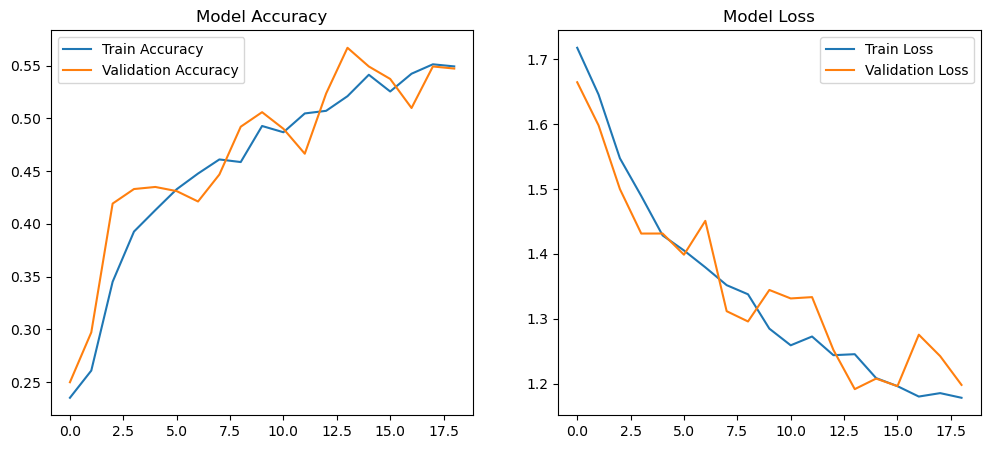

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [10]:
model.save("garbage_classification_model.h5")
print("✅ Model saved successfully as 'garbage_classification_model.h5'")


✅ Model saved successfully as 'garbage_classification_model.h5'


In [38]:
from tensorflow.keras.preprocessing import image

img_path = "trash.jpg"
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
class_label = list(train_data.class_indices.keys())[class_idx]
print(f"Predicted: {class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: metal


In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\Shikhaj Somani\OneDrive\Desktop\ML\Garbage Classification\glass1.jpg"  # use your actual image path

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_idx = np.argmax(pred)
class_label = list(train_data.class_indices.keys())[class_idx]

print(f"✅ Predicted class: {class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
✅ Predicted class: metal
